Simple DNN model using composite indicator as an input and optimal max-shape portfolio for the next period as an output

## Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
import os
os.chdir(os.path.expanduser('../data'))

from dotenv import load_dotenv
load_dotenv()

from DataProvider import DataProvider

In [3]:
data_provider = DataProvider()

df_countries, benchmark = data_provider.get_etf_data()
acwi_weights = data_provider.get_acwi_weights()

In [4]:
days_to_recalculate = data_provider.get_days_to_recalculate()

# Start after 1 year to have enough historic data for first calculated period
days_to_recalculate = days_to_recalculate.iloc[12:]
days_to_recalculate = pd.DatetimeIndex(days_to_recalculate)
days_to_recalculate

DatetimeIndex(['2000-01-04', '2000-02-04', '2000-03-06', '2000-04-04',
               '2000-05-04', '2000-06-06', '2000-07-05', '2000-08-04',
               '2000-09-06', '2000-10-04',
               ...
               '2023-03-03', '2023-04-06', '2023-05-04', '2023-06-06',
               '2023-07-06', '2023-08-03', '2023-09-06', '2023-10-05',
               '2023-11-03', '2023-12-05'],
              dtype='datetime64[ns]', name='Days to rebalance', length=288, freq=None)

In [5]:
x = []
for date in days_to_recalculate:
    indicators = data_provider.calculate_composite_indicator(
        date, periods=6)
    x.append(indicators.values)

x = np.array(x)
x.shape

(288, 6, 27)

In [6]:
os.chdir(os.path.expanduser('..'))

from PortfolioOptimizer import PortfolioOptimizer

In [7]:
y = []
for i in range(0,len(days_to_recalculate)):
    if i == len(days_to_recalculate) - 1:
        data_period = df_countries.loc[
            days_to_recalculate[i]:]
    else:
        data_period = df_countries.loc[
            days_to_recalculate[i]:days_to_recalculate[i+1]]
    i += 1

    year_str = str(data_period.index[0].year)
    acwi_weights_year = acwi_weights.loc[year_str]

    optimizer = PortfolioOptimizer()
    optimal_portfolio = optimizer.get_optimal_portfolio(
        data_period, acwi_weights_year)
    y.append(optimal_portfolio.values)

y = np.array(y)
y.shape

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


(288, 27)

## Splitting data into 80% test, 10% validation and 10% test

In [8]:
val_split = int(0.8 * x.shape[0])
test_split = int(0.9 * x.shape[0])

In [9]:
# Train
dates_for_training = days_to_recalculate[:val_split]
print(dates_for_training)

x_train = x[:val_split]
print(x_train.shape)
y_train = y[:val_split]
print(y_train.shape)

DatetimeIndex(['2000-01-04', '2000-02-04', '2000-03-06', '2000-04-04',
               '2000-05-04', '2000-06-06', '2000-07-05', '2000-08-04',
               '2000-09-06', '2000-10-04',
               ...
               '2018-05-04', '2018-06-05', '2018-07-06', '2018-08-03',
               '2018-09-05', '2018-10-04', '2018-11-06', '2018-12-06',
               '2019-01-10', '2019-02-08'],
              dtype='datetime64[ns]', name='Days to rebalance', length=230, freq=None)
(230, 6, 27)
(230, 27)


In [10]:
# Validation
dates_for_validation = days_to_recalculate[val_split:test_split]
print(dates_for_validation)

x_val = x[val_split:test_split]
print(x_val.shape)
y_val = y[val_split:test_split]
print(y_val.shape)

DatetimeIndex(['2019-03-05', '2019-04-04', '2019-05-07', '2019-06-05',
               '2019-07-05', '2019-08-06', '2019-09-04', '2019-10-04',
               '2019-11-05', '2019-12-04', '2020-01-09', '2020-02-05',
               '2020-03-04', '2020-04-03', '2020-05-06', '2020-06-03',
               '2020-07-07', '2020-08-05', '2020-09-03', '2020-10-07',
               '2020-11-04', '2020-12-03', '2021-01-06', '2021-02-03',
               '2021-03-03', '2021-04-08', '2021-05-05', '2021-06-03',
               '2021-07-07'],
              dtype='datetime64[ns]', name='Days to rebalance', freq=None)
(29, 6, 27)
(29, 27)


In [11]:
# Test
dates_for_test = days_to_recalculate[test_split:]
print(dates_for_test)

x_test = x[test_split:]
print(x_test.shape)
y_test = y[test_split:]
print(y_test.shape)

DatetimeIndex(['2021-08-04', '2021-09-03', '2021-10-06', '2021-11-03',
               '2021-12-03', '2022-01-11', '2022-02-08', '2022-03-04',
               '2022-04-06', '2022-05-06', '2022-06-07', '2022-07-06',
               '2022-08-03', '2022-09-07', '2022-10-06', '2022-11-03',
               '2022-12-06', '2023-01-09', '2023-02-03', '2023-03-03',
               '2023-04-06', '2023-05-04', '2023-06-06', '2023-07-06',
               '2023-08-03', '2023-09-06', '2023-10-05', '2023-11-03',
               '2023-12-05'],
              dtype='datetime64[ns]', name='Days to rebalance', freq=None)
(29, 6, 27)
(29, 27)


## Auxiliary functions

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import L2

In [13]:
def show_loss(hd):
    epochs = range(1, len(hd['loss'])+1)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, hd['loss'], "r", label="train")
    plt.plot(epochs, hd['val_loss'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, hd['loss'], "r", label="train")
    plt.plot(epochs, hd['val_loss'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.title("Loss log")
    plt.legend()
    plt.show()

In [14]:
def train_and_evaluate_model(model, epochs=200, learning_rate=1e-3,
                             with_early_stopping=False):
    start_time = time.time()

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mean_squared_error')
    model.summary()
    print()

    callbacks = []
    if with_early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', 
                                       patience=100))

    callbacks.append(ReduceLROnPlateau(monitor='val_loss', 
                                       patience=50, min_lr=1e-6))
    
    hist = model.fit(x_train, y_train,
                     validation_data=(x_val, y_val),
                     epochs=epochs,
                     callbacks=callbacks)

    train_error = model.evaluate(x_train, y_train, verbose=0)
    print('Train error:', train_error)

    val_error = model.evaluate(x_val, y_val, verbose=0)
    print('Val error:', val_error)

    test_error = model.evaluate(x_test, y_test, verbose=0)
    print('Test error:', test_error)

    print('Execution time', round(time.time() - start_time, 2), 'seconds')

    show_loss(hist.history)

## Simple DNN Model

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8495 - val_loss: 2.5787 - learning_rate: 0.0010
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4923 - val_loss: 2.2485 - learning_rate: 0.0010
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1708 - val_loss: 1.9536 - learning_rate: 0.0010
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8846 - val_loss: 1.6924 - learning_rate: 0.0010
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6306 - val_loss: 1.4625 - learning_rate: 0.0010
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4082 - val_loss: 1.2610 - learning_rate: 0.0010
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2132 - val_loss: 1.0851 - learning_rate: 0.0010
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0433 - val_loss: 0.9318 - learning_rate: 0.0010
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8949 - val_loss: 0.7986 - learning_rate: 0.0010
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━

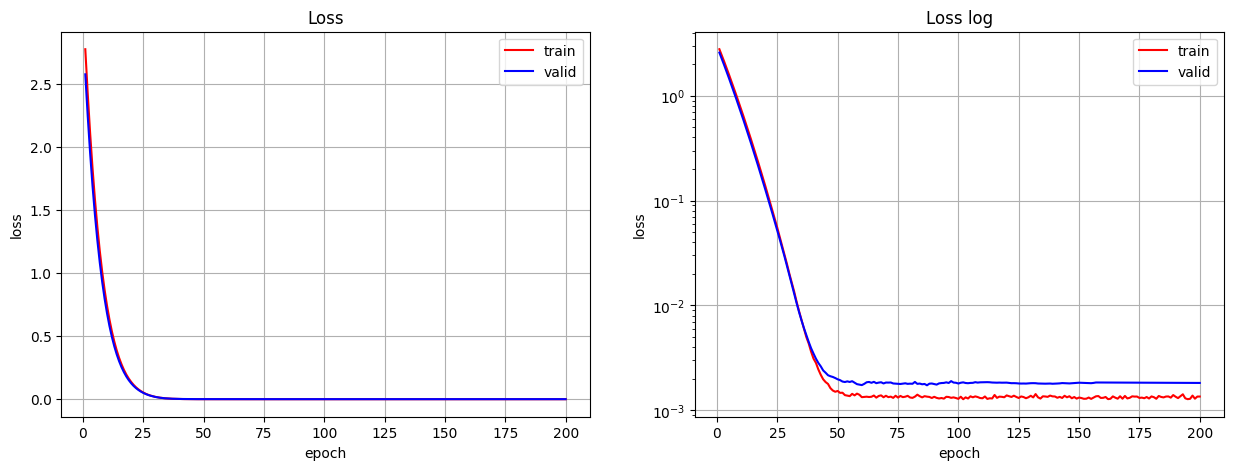

In [158]:
model_dnn = Sequential((
    Flatten(input_shape=x_train.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn)

In [159]:
predictions = model_dnn.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [160]:
predictions[0].round(3)

array([0.401, 0.084, 0.082, 0.035, 0.029, 0.035, 0.028, 0.025, 0.013,
       0.014, 0.014, 0.015, 0.016, 0.014, 0.017, 0.013, 0.013, 0.015,
       0.021, 0.014, 0.016, 0.016, 0.014, 0.018, 0.013, 0.012, 0.014],
      dtype=float32)

In [161]:
y_test[0]

array([0.586, 0.124, 0.02 , 0.014, 0.014, 0.012, 0.012, 0.01 , 0.03 ,
       0.006, 0.004, 0.003, 0.003, 0.002, 0.024, 0.002, 0.001, 0.001,
       0.019, 0.009, 0.03 , 0.008, 0.003, 0.03 , 0.002, 0.001, 0.03 ])

## Backtesting

In [162]:
benchmark_test = benchmark[dates_for_test[0]:]
benchmark_returns = np.log(benchmark_test).diff().dropna()
cum_benchmark_returns = (1 + benchmark_returns).cumprod() - 1
cum_benchmark_returns.loc[dates_for_test[0]] = 0
cum_benchmark_returns.sort_index(inplace=True)

In [163]:
days_to_rebalance = dates_for_test.insert(29, df_countries.index.values[-1])
df_prices_test = df_countries[dates_for_test[0]:]
df_returns_test = np.log(df_prices_test).diff().fillna(0)
df_returns_test

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
2021-08-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-08-05,0.006313,0.005904,0.003907,0.006434,0.006670,0.002376,0.004875,0.007239,0.002568,-0.000613,...,0.004225,-0.011670,0.003683,0.007636,0.002406,-0.009075,0.007761,-0.008597,0.002852,0.003658
2021-08-06,0.001651,-0.002063,-0.002705,0.001602,-0.000510,-0.008940,-0.006027,0.000000,-0.004745,-0.011942,...,-0.010249,-0.012373,-0.008925,-0.007417,-0.012315,0.007213,-0.009003,-0.009295,-0.007141,-0.005698
2021-08-09,-0.000814,-0.000589,-0.000902,-0.003207,-0.003331,0.000399,-0.002594,-0.003805,0.003759,-0.003318,...,-0.004628,0.017669,-0.004648,-0.005490,-0.000995,-0.003199,0.001807,-0.007497,-0.008430,0.002851
2021-08-10,0.001243,0.000589,0.005106,0.006667,0.001026,0.002390,0.002308,0.005320,0.003153,0.001453,...,0.009238,0.008857,-0.009520,0.000441,-0.014389,0.003734,0.005179,-0.000629,0.006791,-0.001221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.002008,0.003163,0.003347,0.007439,-0.001277,0.001265,-0.000677,0.002478,-0.008999,0.009940,...,0.006272,-0.027117,0.003604,0.004144,-0.002342,0.008412,0.000000,-0.013649,-0.000590,0.003788
2023-12-26,0.004214,-0.000316,0.005151,0.010920,0.006115,0.005255,0.005742,0.008217,0.009223,0.004302,...,0.009542,0.007101,0.020918,0.003509,0.004679,0.015193,0.000000,0.005384,0.007346,-0.002366
2023-12-27,0.001806,0.005513,0.003921,0.001085,0.003550,0.007727,0.005710,0.004898,0.004691,0.008299,...,0.012310,-0.001011,0.009861,0.006367,0.008984,0.003408,0.000000,0.024115,0.002193,0.002366
2023-12-28,0.000378,0.005951,-0.005131,-0.004621,-0.009664,-0.004378,-0.006720,-0.002854,-0.005139,-0.004518,...,-0.013136,0.023254,0.003700,0.003679,0.017275,-0.004547,0.000000,-0.024847,-0.007330,0.002360


In [164]:
predictions_test = model_dnn.predict(x_test)
predictions_test_df = pd.DataFrame(predictions_test,
                                   index=dates_for_test,
                                   columns=df_countries.columns)
predictions_test_df = predictions_test_df.reindex(index=df_prices_test.index)
predictions_test_df = predictions_test_df.ffill() # Fill the entire month with predicted weights
predictions_test_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
2021-08-04,0.400732,0.083785,0.082302,0.035281,0.029351,0.034579,0.027608,0.025212,0.012853,0.013956,...,0.014611,0.020777,0.013918,0.016266,0.015526,0.014141,0.017585,0.01340,0.012455,0.014161
2021-08-05,0.400732,0.083785,0.082302,0.035281,0.029351,0.034579,0.027608,0.025212,0.012853,0.013956,...,0.014611,0.020777,0.013918,0.016266,0.015526,0.014141,0.017585,0.01340,0.012455,0.014161
2021-08-06,0.400732,0.083785,0.082302,0.035281,0.029351,0.034579,0.027608,0.025212,0.012853,0.013956,...,0.014611,0.020777,0.013918,0.016266,0.015526,0.014141,0.017585,0.01340,0.012455,0.014161
2021-08-09,0.400732,0.083785,0.082302,0.035281,0.029351,0.034579,0.027608,0.025212,0.012853,0.013956,...,0.014611,0.020777,0.013918,0.016266,0.015526,0.014141,0.017585,0.01340,0.012455,0.014161
2021-08-10,0.400732,0.083785,0.082302,0.035281,0.029351,0.034579,0.027608,0.025212,0.012853,0.013956,...,0.014611,0.020777,0.013918,0.016266,0.015526,0.014141,0.017585,0.01340,0.012455,0.014161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.378300,0.084367,0.082873,0.036263,0.030422,0.035846,0.028647,0.026136,0.013818,0.014605,...,0.015419,0.021758,0.014635,0.017130,0.016373,0.014975,0.018445,0.01423,0.013335,0.015014
2023-12-26,0.378300,0.084367,0.082873,0.036263,0.030422,0.035846,0.028647,0.026136,0.013818,0.014605,...,0.015419,0.021758,0.014635,0.017130,0.016373,0.014975,0.018445,0.01423,0.013335,0.015014
2023-12-27,0.378300,0.084367,0.082873,0.036263,0.030422,0.035846,0.028647,0.026136,0.013818,0.014605,...,0.015419,0.021758,0.014635,0.017130,0.016373,0.014975,0.018445,0.01423,0.013335,0.015014
2023-12-28,0.378300,0.084367,0.082873,0.036263,0.030422,0.035846,0.028647,0.026136,0.013818,0.014605,...,0.015419,0.021758,0.014635,0.017130,0.016373,0.014975,0.018445,0.01423,0.013335,0.015014


In [165]:
summed_returns = (df_returns_test.values *
                  predictions_test_df.values).sum(axis=1)
total_returns = pd.Series(index=df_returns_test.index,
                          data=summed_returns)
cum_total_returns = (1 + total_returns).cumprod() - 1
cum_total_returns.loc[days_to_rebalance[0]] = 0
cum_total_returns.sort_index(inplace=True)

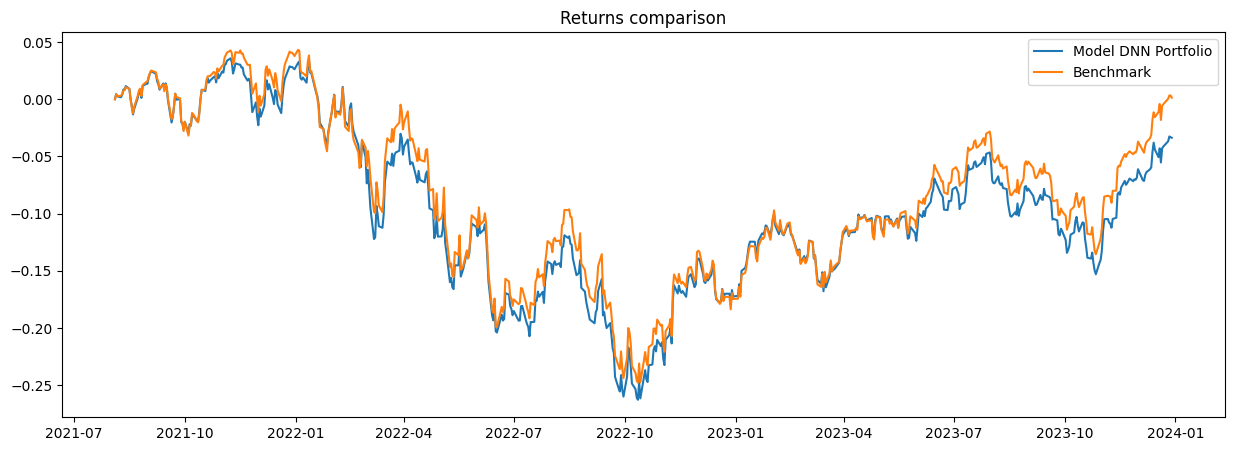

In [166]:
plt.figure(figsize=(15, 5))
plt.plot(cum_total_returns, label='Model DNN Portfolio')
plt.plot(cum_benchmark_returns, label='Benchmark')
plt.legend()
plt.title('Returns comparison')
plt.show()

In [167]:
def daily_to_annual_returns(daily_returns):
    daily_returns.iloc[0] = 0
    tot_ret = (daily_returns + 1).prod() - 1
    
    init_date = daily_returns.index[0]
    end_date = daily_returns.index[-1]
    fyears = (end_date - init_date) / pd.Timedelta(days=365, hours=6)
    
    anual_ret = np.power(tot_ret + 1, 1/fyears) - 1
    return anual_ret

In [168]:
def print_metrics(df_returns):
    annual_returns = daily_to_annual_returns(df_returns)
    print('Annual returns:', annual_returns)

    annual_volatility = df_returns.std()*np.sqrt(252)
    print('Annual volatility:', annual_volatility)

    annual_sharpe = annual_returns/annual_volatility
    print('Annual Sharpe Ratio:', annual_sharpe)

In [169]:
# Benchmark
print_metrics(benchmark_returns)

Annual returns: -0.0011762328956063106
Annual volatility: 0.17466297624247515
Annual Sharpe Ratio: -0.006734300084142676


In [170]:
# Model DNN Portfolio
print_metrics(total_returns) 

Annual returns: -0.014147811385222253
Annual volatility: 0.16749550761707255
Annual Sharpe Ratio: -0.08446681099989209
